In [2]:
import warnings
warnings.filterwarnings('ignore')

# Intro to ML basic libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.model_selection import train_test_split
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 3.4.1 주성분분석 (PCA, principal component analysis)

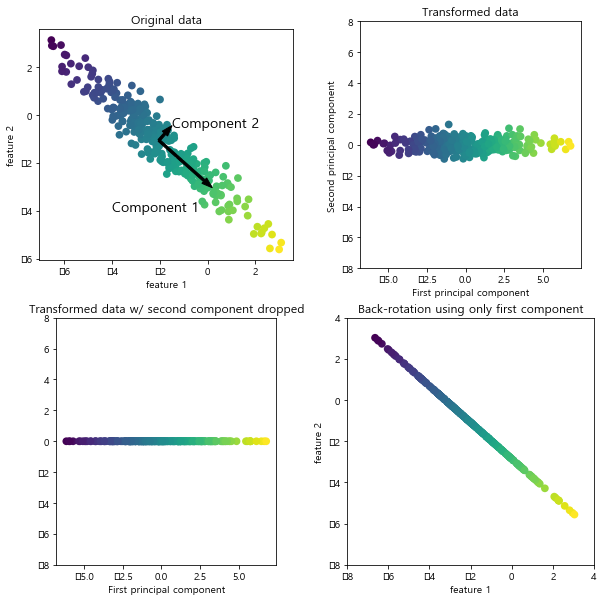

In [3]:
mglearn.plots.plot_pca_illustration()

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

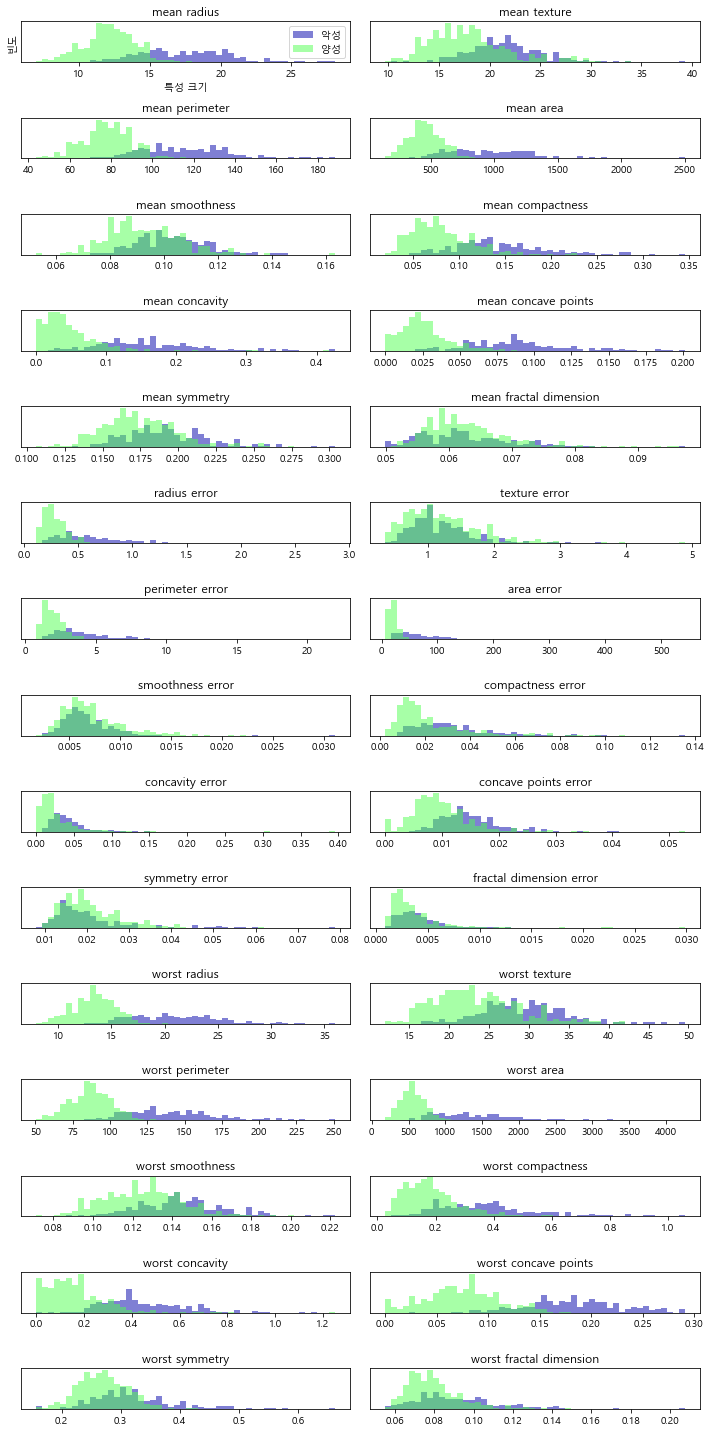

In [5]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성', '양성'], loc='best')
fig.tight_layout()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # 데이터의 처음 두 개 주성분만 유지
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print('원본 데이터 형태:', str(X_scaled.shape))
print('축소된 데이터 형태:', str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, '2nd pca')

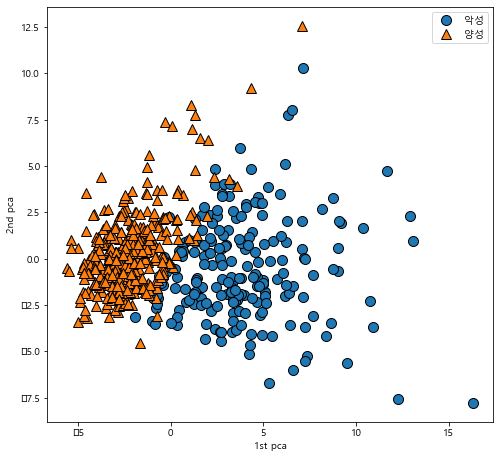

In [9]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['악성', '양성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('1st pca')
plt.ylabel('2nd pca')

In [10]:
print('pca 주성분 형태:', pca.components_.shape)

pca 주성분 형태: (2, 30)


In [11]:
print('pca 주성분:', pca.components_)

pca 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'pca')

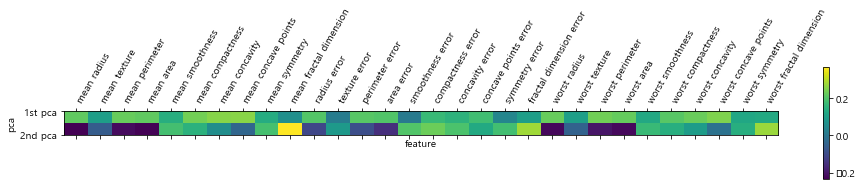

In [12]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['1st pca', '2nd pca'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel('feature')
plt.ylabel('pca')

### 고유얼굴(eigenface) 특성 추출

In [ ]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

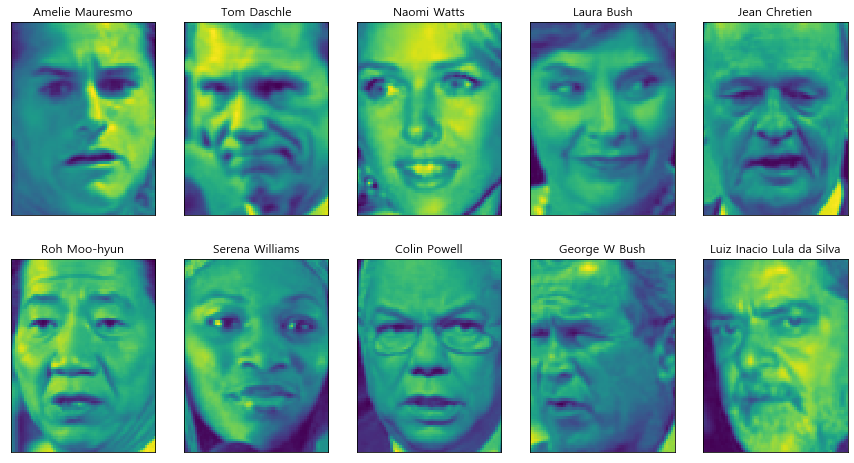

In [15]:
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [16]:
print('people.images.shape:', people.images.shape)
print('클래스 개수:', len(people.target_names))

people.images.shape: (2986, 87, 65)
클래스 개수: 61


In [17]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name, count), end='    ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [18]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.  # 0~255 흑백 픽셀값을 0~1로 스케일 조정. MinMaxScaler와 비슷.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('1-최근접 이웃의 테스트 세트 점수: {:.2f}'.format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.24


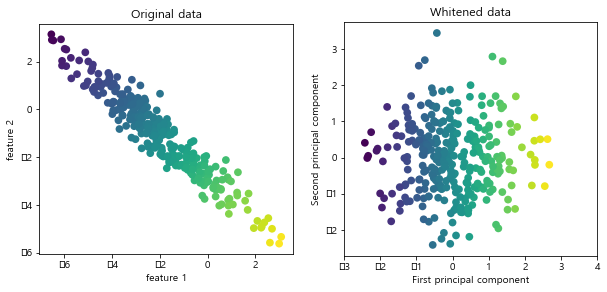

In [20]:
mglearn.plots.plot_pca_whitening()

In [21]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape:', X_train_pca.shape)

X_train_pca.shape: (1519, 100)


In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("test set acc: {:.2f}".format(knn.score(X_test_pca, y_test)))

test set acc: 0.31


In [23]:
print('pca.components_.shape:', pca.components_.shape)

pca.components_.shape: (100, 5655)


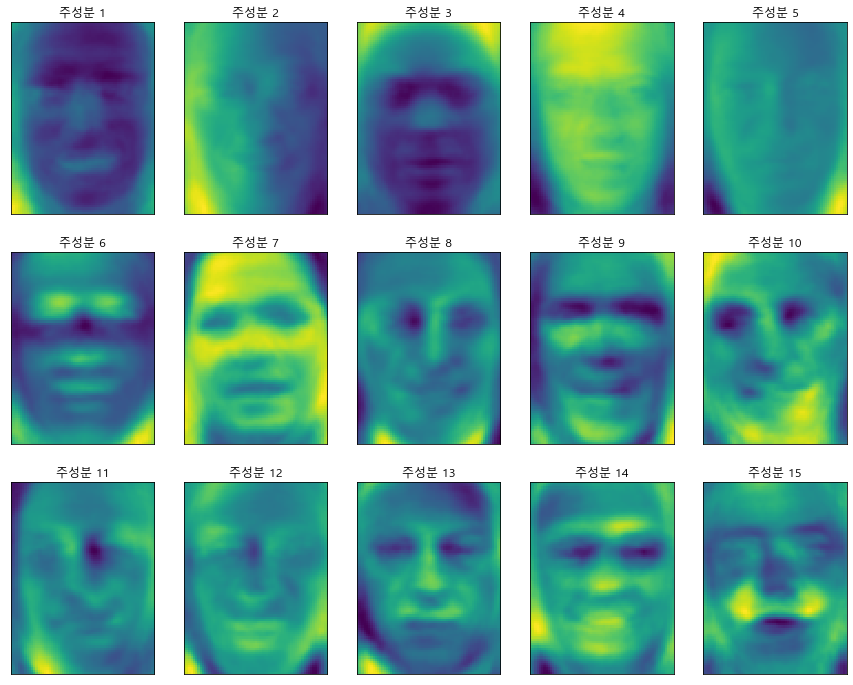

In [24]:
fig, axes = plt.subplots(3, 5, figsize=(15,12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('주성분 {}'.format((i+1)))

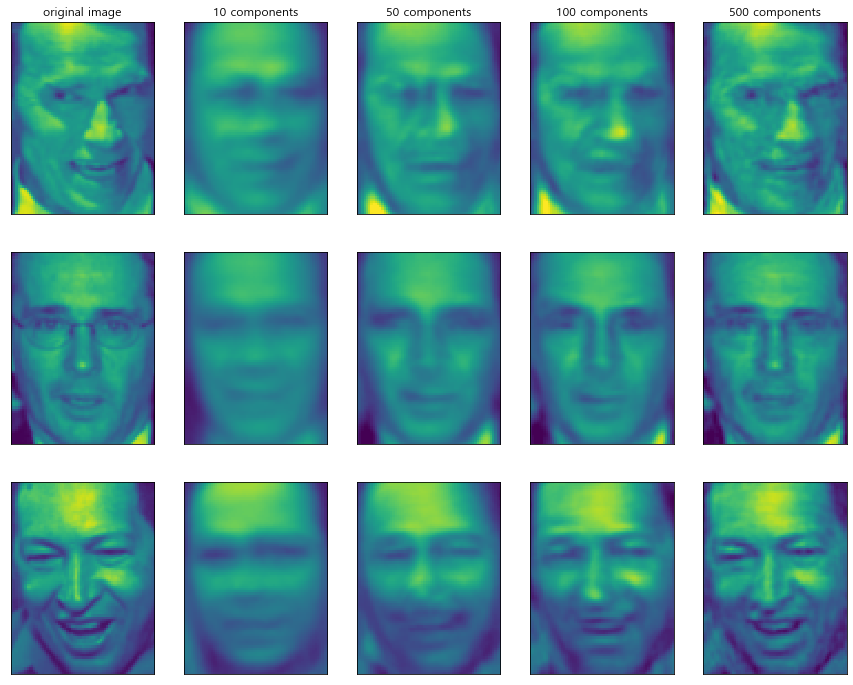

In [25]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '2nd pca')

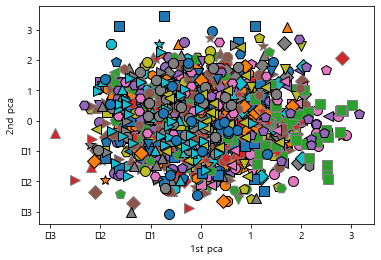

In [26]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('1st pca')
plt.ylabel('2nd pca')

## 3.4.2 비음수 행렬 분해 (NMF, Non-negative Matrix Factorization)

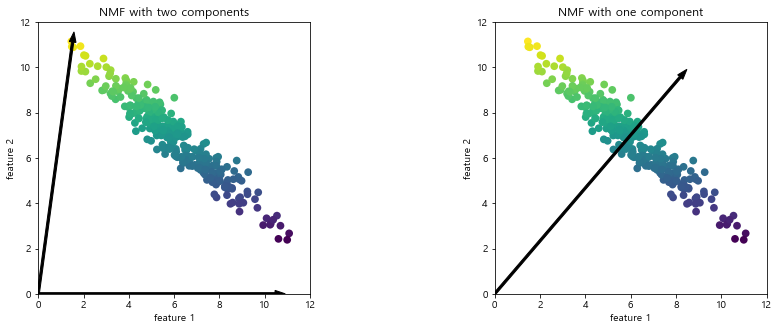

In [27]:
mglearn.plots.plot_nmf_illustration()

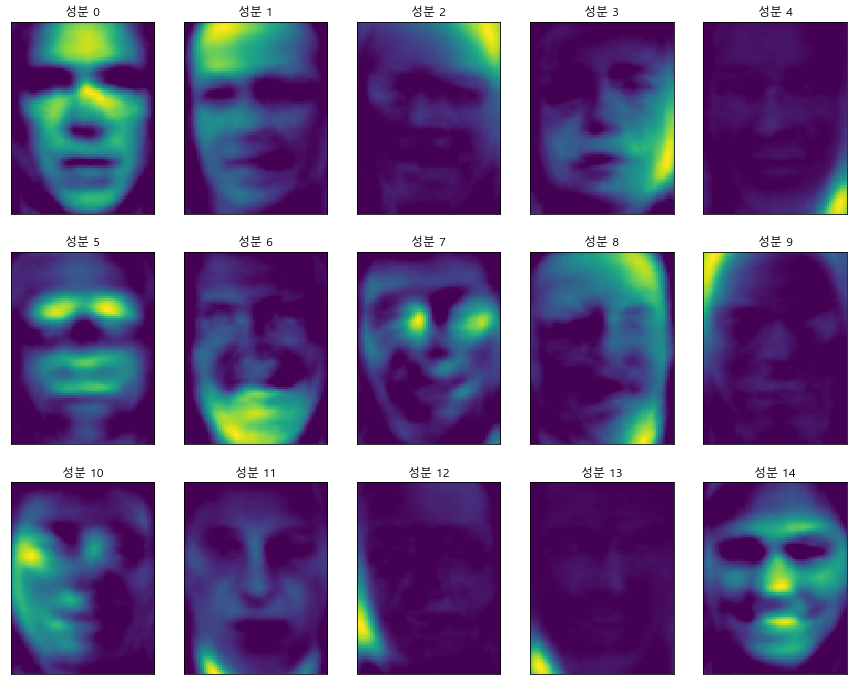

In [28]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('성분 {}'.format(i))

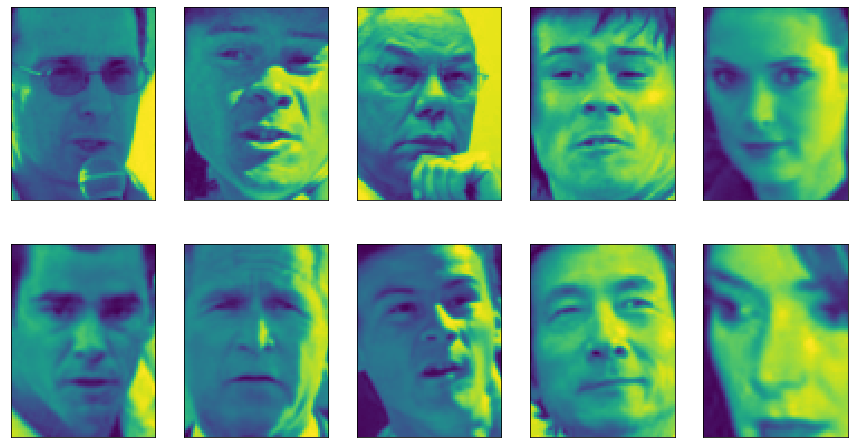

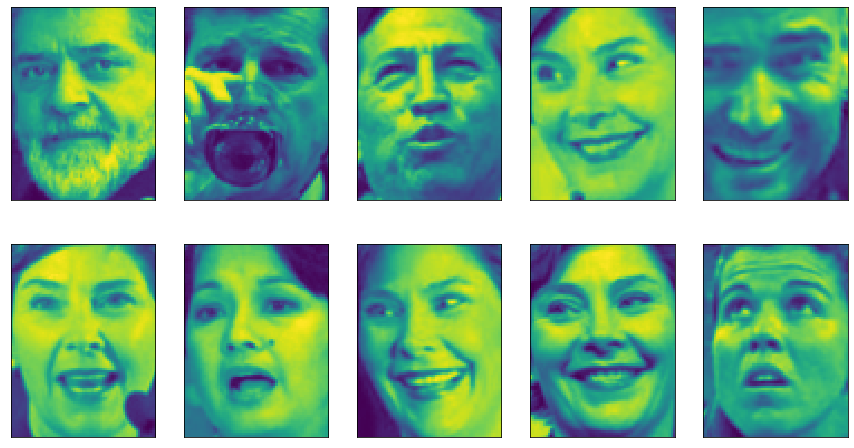

In [29]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, '신호')

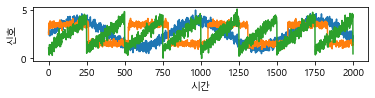

In [32]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel('시간')
plt.ylabel('신호')

In [34]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만든다
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print('측정 데이터 형태:', X.shape)

측정 데이터 형태: (2000, 100)


In [47]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print('복원한 신호 데이터 형태:', S_.shape)

복원한 신호 데이터 형태: (2000, 3)


In [48]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

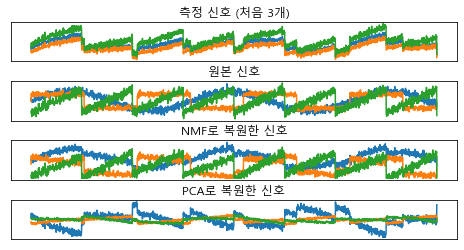

In [49]:
models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)', '원본 신호', 'NMF로 복원한 신호', 'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace': 0.5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

## 3.4.3 t_SNE를 이용한 매니폴드 학습
#### manifold learning: PCA 산점도 시각화는 유용성이 떨어지는데, 매니폴드 학습 알고리즘은 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공한다. 특히  t_SNE가 많이 사용된다.
#### 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾음.

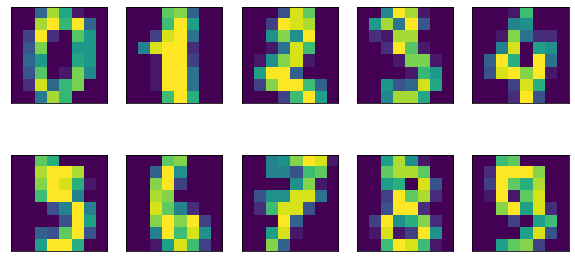

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, '2nd pca')

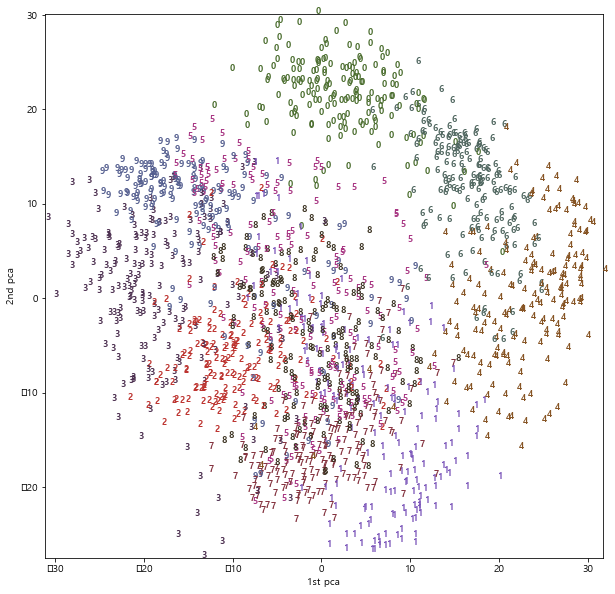

In [53]:
# PCA 모델을 생성해 2차원으로 축소
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525', '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그림
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size' : 9})
plt.xlabel('1st pca')
plt.ylabel('2nd pca')

Text(0, 0.5, 't-SNE feature 1')

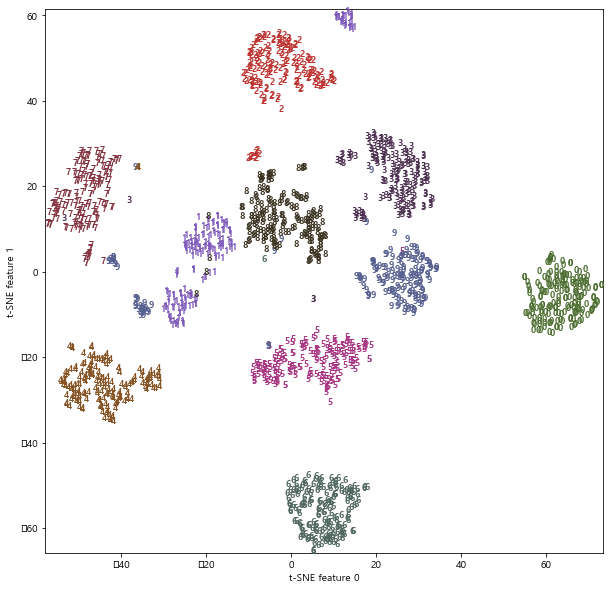

In [55]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그린다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]], fontdict={'weight':'bold', 'size': 9})
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')

In [56]:
# t-SNE는 클래스 레이블 정보를 사용하지 않아 비지도 학습임에도 구분이 매우 잘됨.